In [1]:
# ===== Load packages ====== #
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
from app.config import client

In [2]:
# ====== Connect to MongoDB and import data from a selected BTS! ====== #

# Connect to the database!
db = client["BTS_Dataset"]

# Select the collection!
collection = db["bts_oper_data_soc"]

# Get unique values of 'bts_id'
unique_bts_ids = collection.distinct("bts_id")
print(unique_bts_ids)

['bts111127', 'bts111171', 'bts111172', 'bts111180', 'bts111191', 'bts111210', 'bts111217', 'bts111218', 'bts111220', 'bts111222', 'bts111428', 'bts111429']


In [3]:
# Select one BTS and extract the dataframe!
bts_id = 'bts111180'
df = pd.DataFrame(list(collection.find({"bts_id": bts_id})))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32544 entries, 0 to 32543
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   _id                                32544 non-null  object        
 1   timestamp                          32544 non-null  datetime64[ns]
 2   AC/DC System Output Current(A)     32544 non-null  float64       
 3   Bus Bar Voltage(V)                 32544 non-null  float64       
 4   DC Load Current(A)                 32544 non-null  float64       
 5   DC Load Power(kW)                  32544 non-null  float64       
 6   Battery Current(A)                 32544 non-null  float64       
 7   Battery Voltage(V)                 32544 non-null  float64       
 8   Battery Temperature (degC)         32544 non-null  float64       
 9   Battery Total Discharge Power(Ah)  32544 non-null  float64       
 10  Battery Total Cycle Times         

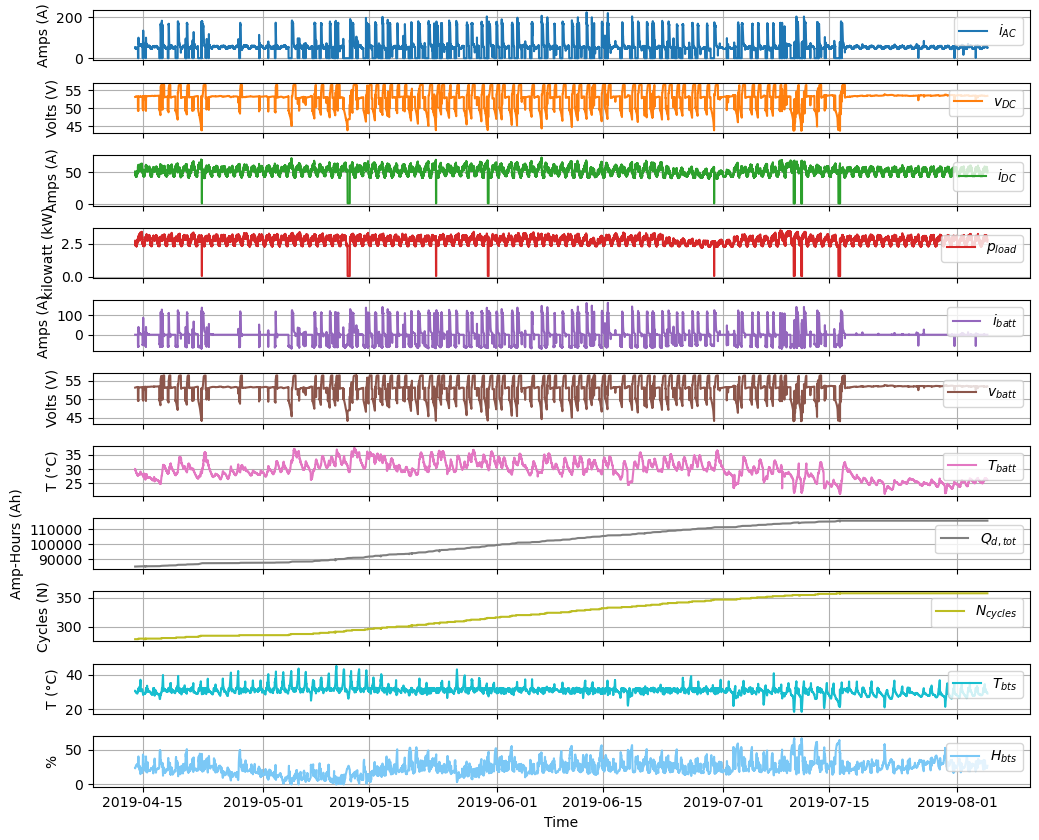

In [4]:
#  Visualize the dataframe!

data_to_plot_o = df.copy()

# Define the columns to plot (by name)
columns_to_plot = ['AC/DC System Output Current(A)', 'Bus Bar Voltage(V)', 'DC Load Current(A)', 
                   'DC Load Power(kW)', 'Battery Current(A)', 'Battery Voltage(V)', 
                   'Battery Temperature (degC)', 'Battery Total Discharge Power(Ah)', 'Battery Total Cycle Times',
                   'Working Temperature(degC)', 'Working Humidity(%)']

# Extract only the selected columns
data_to_plot = data_to_plot_o[columns_to_plot]

# colors = ['pink', 'gray', 'olive', 'cyan', 'indigo', 'gold', 'lightblue', 'lime', 'teal']
colors = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
    'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'xkcd:lightblue'
]

# Define LaTeX-style custom legend labels
custom_legends = [
    r"$i_{AC}$", r"$v_{DC}$", r"$i_{DC}$", r"$p_{load}$", r"$i_{batt}$", r"$v_{batt}$",
    r"$T_{batt}$", r"$Q_{d,tot}$", r"$N_{cycles}$", r"$T_{bts}$", r"$H_{bts}$"
]

# Define formal Y-axis labels
y_labels = [
    'Amps (A)', 'Volts (V)', 'Amps (A)', 'kilowatt (kW)', 'Amps (A)', 'Volts (V)', 'T (°C)',
    'Amp-Hours (Ah)', 'Cycles (N)', 'T (°C)', '%'
]

# Create subplots with shared x-axis
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10.5, 8.5), sharex=True)

# Plot each column on its own axis
for i, col in enumerate(columns_to_plot):
    axes[i].plot(data_to_plot_o['timestamp'], data_to_plot[col], label=custom_legends[i],
                 color=colors[i % len(colors)], linestyle='-')
    axes[i].set_ylabel(y_labels[i])  # Set y-axis label for each subplot
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

# Set common x-axis label
axes[-1].set_xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as PNG and PDF
# plt.savefig('../Outputs/plots/Data_Features3.png', format='png', dpi=300)  # Save as PNG
# plt.savefig('../Outputs/plots/Data_Features3.pdf', format='pdf', dpi=300)  # Save as PDF

# Show the plot
plt.show()